In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/Users/Admin/Downloads/ipynbs/datasets/Iris.csv')
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [4]:
# No preprocessing needed as the iris dataset is already clean.

# Divide the dataset into Independent(X) and Dependent(Y) variables.
X = df.drop('Species', axis=1)
y = df['Species']

# Split the dataset into training and testing datasets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# No feature scaling required for Naïve Bayes algorithm.


In [5]:
# Import the class
from sklearn.naive_bayes import GaussianNB

# Initialize the classifier
gaussian = GaussianNB()

# Train the model
gaussian.fit(X_train, y_train)


GaussianNB()

In [6]:
# Predictions
y_train_pred = gaussian.predict(X_train)
y_test_pred = gaussian.predict(X_test)


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate precision
train_precision = precision_score(y_train, y_train_pred, average='micro')
test_precision = precision_score(y_test, y_test_pred, average='micro')

# Calculate recall
train_recall = recall_score(y_train, y_train_pred, average='micro')
test_recall = recall_score(y_test, y_test_pred, average='micro')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)


In [8]:
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print(" ")
print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)
print(" ")
print("Training Recall:", train_recall)
print("Testing Recall:", test_recall)
print(" ")
print("Confusion Matrix:")
print(cm)


Training Accuracy: 0.9916666666666667
Testing Accuracy: 1.0
 
Training Precision: 0.9916666666666667
Testing Precision: 1.0
 
Training Recall: 0.9916666666666667
Testing Recall: 1.0
 
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


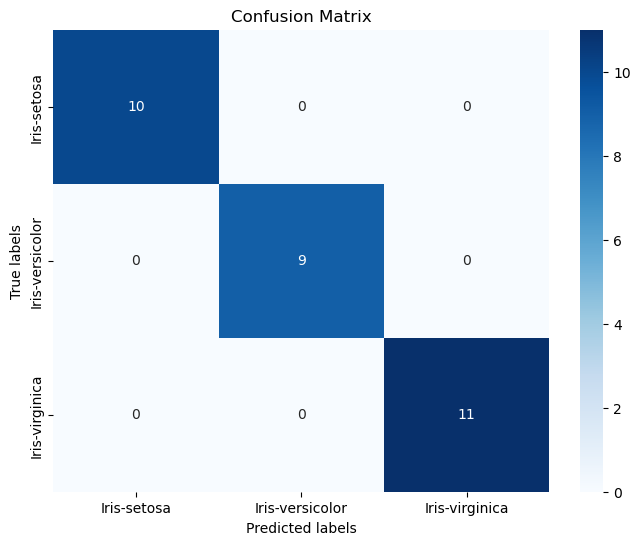

In [9]:
import seaborn as sns

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=gaussian.classes_, yticklabels=gaussian.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
